In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import os
import torch
import torchvision
from PIL.ImageOps import mirror
import shutil
from torchvision import datasets, models, transforms
import torch.nn as nn
import torchvision.transforms.functional as F
from torch.nn import functional as F
import torch.optim as optim

In [ ]:
device = torch.device("cuda:0")
model = models.resnet50(pretrained=False).to(device)
model.fc = nn.Sequential(
    nn.Linear(2048, 128),
    nn.ReLU(inplace=True),
    nn.Linear(128, 2)).to(device)
model.load_state_dict(torch.load('weights.h5'))

In [4]:
img=Image.open('Przechwytywanie.PNG').convert("RGB")

779 532


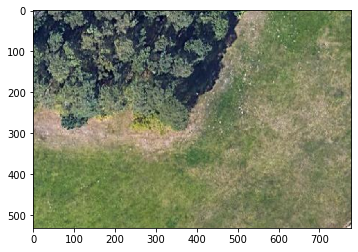

In [5]:
plt.imshow(img)
x,y=img.size
print(x,y)

In [6]:
shutil.rmtree("cropped")

In [104]:
os.mkdir("cropped")

In [105]:
path='cropped'

In [106]:
r=(x-224)*(y-224)
r

170940

In [109]:
top=0
bottom=224+0
left=0
right=0+224
validation_batch = img.crop((left, top, right, bottom))
validation_batch = torchvision.transforms.ToTensor()(validation_batch)
#torch.save(imgc, path+'\crop{}.pt'.format(licz))

In [ ]:
licz=0
for i in range (0,10,1):
    for j in range (1,10,1):
        top=j
        bottom=224+j
        left=i
        right=i+224
        imgc = img.crop((left, top, right, bottom))
        imgc = torchvision.transforms.ToTensor()(imgc)
        #torch.save(imgc, path+'\crop{}.pt'.format(licz))
        validation_batch = torch.stack((validation_batch,imgc),axis=0)
        print(validation_batch.size(),imgc.size())
        licz=licz+1        

In [ ]:
validation_batch.size()

In [4]:
import numpy as np
np.arange(10)[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# wersja ze zbijaniem w paczki
step_size = 16
batch_size = 32
batch_list = []
for vertical_shift in range(0, W, step_size):
    for horizontal_shift in range(0, H, step_size):
        top=horizontal_shift
        bottom=224+horizontal_shift
        left=verticall_shift
        right=224+verticall_shift
        current_crop = img.crop((left, top, right, bottom))
        current_tensor = torchvision.transforms.ToTensor()(imgc).to(device)
        batch_list.append(current_tensor)
        if len(batch_list) == batch_size:
            batch_of_tensors = torch.stack(batch_list)
            wrzuć do modelu -> wyjście wymiaru 32xliczba kategorii
            zrób cyrk z M, C i P
            batch_list = []